# Logistic Regression
Logistic regression is an algorithm that classifies data based on its input features. It makes a model that makes a decision boundary for the data essentially separating, and the algorithm can take new input data and classify it. Here it is assumed that the reader knows a bit about how linear regression with gradient descent works.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset
The dataset I used was one I found which was about student's CGPA and GRE scores and each had a percentage change for entering a hypothetical university. I modified the data a bit so that it looks more clearly separated when plotted, and for it to have only 2 features to make it easier to plot. I used pandas to import the data as it is super easy to work with imported data in python using pandas.

The data was organized in two matrices, one with the features and one with the outputs. A column full of ones was inserted to the features matrix (x0 features). Before that thought the features have to be scaled so that the training process happens faster. In this case I used mean normalization which turns the values of each column between 0 and 1 (or -1 to 1 if I had negative values) and also prevents overflows. The formula for mean normalization for one coulumn of features is:
$$
X' = \frac{X - \mu}{max(X) - min(X)}
$$
Where $ X' $ is the new or transformed coulumn matrix of the feature and $ \mu $ is the mean of the original column matirx of features.

In [3]:
data = pd.read_csv("Admission_Predict.csv", header=None, skiprows=1)  # Skips the first row as it is the header row
X = data[[0, 1]].to_numpy()  # Converts the data (in this case the features) into a numpy array
X = X.astype(np.float32)
X = (X - np.mean(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))  # Mean normalization
X = np.insert(X, 0, 1, axis=1)  # Adds the x0 column
y = data[2].to_numpy()  # Output column
y = y.astype(np.float32())

Since this is a classification algorithm, the data needs to be classified. I chose 0 and 1 as classifiers with 1 representing that the student will get accepted, with a decision boundary of 70% which I chose arbitrarily. This can be vizualized with a scatterplot with blue dots repressenting the data labeled as 1, and each axis being a feature.

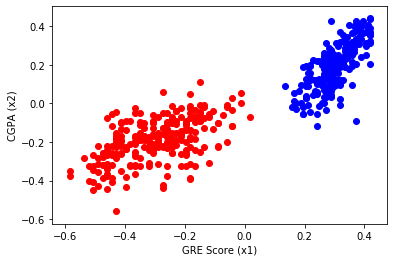

In [4]:
y = np.where( y >= 0.73, 1, 0)  # All values greater than or equal to 0.73 become 1, the rest become 0
color = {0: "red", 1: "blue"}  # Defining the colors of the outputs
plot_1 = X[:, 1]  # x1 features go on the x axis
plot_2 = X[:, 2]  # x2 features go on the y axis
for i in np.unique(y):
    ix = np.where(y == i)
    plt.scatter(plot_1[ix], plot_2[ix], c=color[i])
plt.xlabel("GRE Score (x1)")
plt.ylabel("CGPA (x2)")
plt.show()

In the end the computer should be able to draw a straight line that separates the data.

## Prediction
A function needs to be defined to predict an output. In this case we have 3 features (including the x0 features) so we can have 3 parameters. We can have the features (for each training example) and parameters in matrices and i repressenting the ith training example so for example $ x_1^{(2)} $ would be the first feature of the second training example. This can be generalized for $ n $ number of features.
$$
x^{(i)} = \begin{bmatrix}
x_0^{(i)} \\
x_1^{(i)} \\
\vdots \\
x_n^{(i)} 
\end{bmatrix}
\theta = \begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{bmatrix}
$$
If the same hypothesis function used in linear regression is used here namely: $ h_{\theta}(x^{(i)}) = \theta^T x^{(i)} $ then we end up with values that are not between 0 and 1, so this function is passed through a function called the sigmoid or logistic function.
$$
g(x) = \frac{1}{1 + e^{-x}}
$$

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

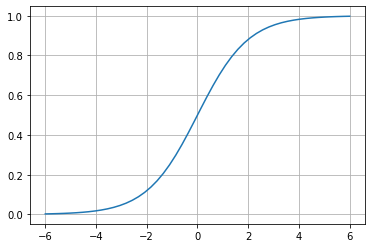

In [6]:
plotx = np.linspace(-6, 6)
ploty = sigmoid(plotx)
plt.plot(plotx, ploty)
plt.grid()
plt.show()

This function outputs values close to zero when its input is low and values close to 1 when its input is very high. We can interpret this result as how sure the computer thinks that the given features output a 1 or the probability the features output a one. So in the end:
$$
h_{\theta}(x^{(i)}) = g(\theta^T x^{(i)})
$$

In [7]:
thetas = np.random.standard_normal((X.shape[1], 1))  # Randomly chose values for the parameters
def hypothesis(data_in, parameters):
    p = np.dot(parameters.T, data_in.reshape((len(data_in), 1)))
    return sigmoid(p)

## Cost
If the same cost function for linear regression is used here we encounter a problem. It will not have a glovball minimum but rather a lot of local minimums. This means that the training will not converge to the lowest possible value. For this another cost function is defined. $ y^{(i)} $ represents the output of the ith training example.
$$
Cost(h_{\theta}(x^{(i)}), y^{(i)}) = \begin{matrix} -log(h_{\theta}(x^{(i)})), & y = 1 \\ -log(1 - h_{\theta}(x^{(i)})), & y = 0 \end{matrix}
$$
This is a piecewise function but at the time of writing Jupyter does not have the proper LaTex support for proper piecewise function notation. 

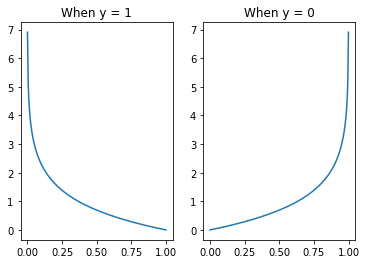

In [8]:
xplotc = np.linspace(0.001, 0.999, num=200)

yplot1 = -1*np.log(xplotc)
yplot2 = -1*np.log(1 - xplotc)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(xplotc, yplot1)
ax1.set_title("When y = 1")
ax2.plot(xplotc, yplot2)
ax2.set_title("When y = 0")
plt.show()

In the case of y = 1 we use a cost function that outputs low values when the computer predicts a value near one and vice versa for the case when y = 0.

We can combine these into one function for the average cost for all training examples where $ m $ is the number of training examples.
$$
Cost(h_{\theta}(x^{(i)}), y^{(i)}) = -\frac{1}{m} \left [\sum_{i=1}^{m} (y^{(i)})log((h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))\right ]
$$
When y = 1 then $ log(1 - (h_{\theta}(x^{(i)})) $ is equal to zero as it is multiplied with $ 1 - y^{(i)} $ leaving with $ log((h_{\theta}(x^{(i)})) $ which is the cost function when y = 1 and vice versa when y = 0. The great thing about this formula is that it is a convex function meaning that we wont have many local minimums. This function can encounter a log(0) error, but with feature scaling this should not be a problem.

We also need the partial derivatives for each parameter. The partial derivatives are quite simple and are in fact the same as in linear regression, where $ j $ repressents the jth feature and $ J(\theta) $ is just the cost function but in simpler notation.
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left ( h_{\theta}(x^{(i)}) - y^{(i)}\right)x^{(i)}_j
$$
In the program I put all the paritial derivatives in a matrix so during the training process all the parameters can be updated simultaneously.

In [9]:
def costs(data_in, ouputs, parameters):
    cost = []  # A list to contain the costs of each parameter for each training example
    derivs = []  # A list to contain the values of the cost derivatives of each parameter for each training example
    for x, y in zip(data_in, ouputs):
        p = hypothesis(x, parameters)  # Prediction
        c = y * np.log(p) + (1 - y) * np.log(1 - p)  # Cost of that training example
        d = (p - y) * x  # Cost derivative of that training example.
        cost.append(c)  # Cost of that training example gets added to the list
        derivs.append(d)
    cost = np.mean(cost) * -1  # Calculates the average cost
    derivs = np.mean(derivs, axis=0)  # Average value of the cost derivative for each training example.
    return cost, derivs

## Training
The partial derivatives of the cost function can be used to make a vector which tells us the gradient of the cost function. This gives us the direction of greatest ascent, or what changes to the parameters will give us the greatest increase to the cost. We want the opposite so the negative is used.
$$
\nabla J(\theta) = \begin{bmatrix} \frac{\partial J(\theta)}{\partial \theta_0} \\ \frac{\partial J(\theta)}{\partial \theta_1} \\ \vdots \\ \frac{\partial J(\theta)}{\partial \theta_n} \end{bmatrix}
$$
And to update all the parameters simultaneusly for one iteration:
$$
\theta := \theta - \alpha \nabla J(\theta)
$$
$ := $ represent assingment and $ \alpha $ is a constant called the learning rate. It is important to chose a suitable learning rate as low values slow the process down and too high values overshoot and the cost increases because of that. The function below also graphs the cost against iteration which will help when choosing values for the learning rate.

In [10]:
def train(data_in, outputs, parameters, iterations=1, alpha=0.2):
    change = parameters.T  # This will be the end result of the training
    p = []  # A list to hold the cost in each iteration
    x = []  # A list to hold the number of each iteration
    for i in range(iterations):
        Cs, Ds = costs(data_in, outputs, parameters)
        p.append(Cs)
        x.append(i)
        change -= alpha * Ds
    print(Cs)
    plt.plot(x, p)  # Plot cost against iteration
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    return change.T

0.035299506523620454


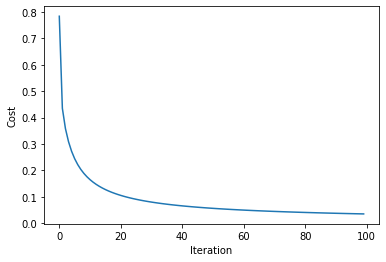

In [11]:
thetas = train(X, y, thetas, 100, 5.7)

The graph above is ideal. If it were much less steep then the learning rate is too low, but if the function is increasing in value over the span of the iterations then the learning rate is too high.

## Visualizing the Result
We have already plotted the data, but the decision boundary can also be plotted. If we exapand the hypothesis function we get (in this case with 2 features and remember $ x_0 $ is just equal to 1) $ h_{\theta}(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2) $ which we can interpret as the probability that the computer thinks the given data entry is calssified as 1. We can say that if the inside part of $ g(x) $ is greater than or equal to zero then the data entry is classified as 1, as $ g(0) $ is equal to 0.5 which we can interpret as the computer being 50% sure its calssified as a 1. We can then form an inequality than must be true if we want $ y = 1 $
$$
\theta_0 + \theta_1 x_1 + \theta_2 x_2 \geq 0
$$
Remember that $ x_2 $ is on the y axis in the scatterplot so we can rearrange the inequality to get a linear inequality we can plot.
$$
x_2 \geq - \frac{\theta_0 + \theta_1 x_1}{\theta_2}
$$
The blue shaded area repressents where $ y = 1 $

In [14]:
def plot(inputs, outputs, parameters):
    color = {0: "red", 1: "blue"}  # Assing the colors to y values
    plt.figure()
    plot_1 = inputs[:, 1]  # x1 features go on the x axis
    plot_2 = inputs[:, 2]  # x2 features go in the y axis
    for i in np.unique(outputs):
        ix = np.where(outputs == i)
        plt.scatter(plot_1[ix], plot_2[ix], c=color[i])
    x_plot = np.linspace(np.min(plot_1), np.max(plot_1))
    y_plot = -1*(parameters[1]*x_plot / parameters[2]) - (parameters[0] / 
                                                          parameters[2])  # x2 plot
    plt.plot(x_plot, y_plot)  # Plot the line
    plt.fill_between(x_plot, y_plot, np.min(y_plot), alpha=0.2, color="red")  # Shade red where y = 0
    plt.fill_between(x_plot, y_plot, np.max(y_plot), alpha=0.2, color="blue")  # Shade blue where y = 1
    plt.xlabel("GRE Score")
    plt.ylabel("CGPA")
    plt.show()

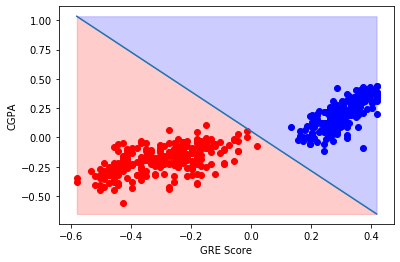

In [15]:
plot(X, y, thetas)